In [2]:
import pandas as pd
import numpy as np
import requests
import json
# from 4/4/22 0:00 UTC to 5/23/22 0:00 UTC 
pd.set_option("display.precision", 15)
#df.index.name='Index1' = to give index a name 
#/markets/GMT-PERP/candles?resolution={resolution}&start_time={start_time}&end_time={end_time}
# Date range  Monday, June 6, 2022 12:00:00 AM   to Friday, June 10, 2022 12:00:00 AM


market = requests.get('https://ftx.com/api/markets/ALGO-PERP/candles?resolution=60&start_time=1654473600&end_time=1654560000').json()
df = pd.DataFrame(market['result'])

market2 =  requests.get('https://ftx.com/api/markets/ALGO-PERP/candles?resolution=60&start_time=1654560060&end_time=1654646400').json()
df2 = pd.DataFrame(market2['result']) 

market3 =  requests.get('https://ftx.com/api/markets/ALGO-PERP/candles?resolution=60&start_time=1654646460&end_time=1654732800').json()
df3 = pd.DataFrame(market3['result'])

market4 =  requests.get('https://ftx.com/api/markets/ALGO-PERP/candles?resolution=60&start_time=1654732860&end_time=1654819200').json()
df4 = pd.DataFrame(market4['result'])


pd.set_option('display.max_rows', 6000)
 #not working to expand rows , can't even see it with tail 



In [3]:
merged_df = pd.concat([df, df2, df3, df4])
len(merged_df.index) # why does it show only 1440 
print(merged_df.tail(50)) 
print(merged_df.reset_index(drop=True).tail(50))
len(merged_df)
type(merged_df)

                      startTime             time    open    high     low  \
1390  2022-06-09T23:11:00+00:00  1654816260000.0  0.4016  0.4016  0.4014   
1391  2022-06-09T23:12:00+00:00  1654816320000.0  0.4014  0.4014  0.4012   
1392  2022-06-09T23:13:00+00:00  1654816380000.0  0.4012  0.4012  0.4009   
1393  2022-06-09T23:14:00+00:00  1654816440000.0  0.4009  0.4011  0.4006   
1394  2022-06-09T23:15:00+00:00  1654816500000.0  0.4009  0.4011  0.4005   
1395  2022-06-09T23:16:00+00:00  1654816560000.0  0.4007  0.4007  0.3991   
1396  2022-06-09T23:17:00+00:00  1654816620000.0  0.3996  0.4002  0.3996   
1397  2022-06-09T23:18:00+00:00  1654816680000.0  0.4002  0.4013  0.4002   
1398  2022-06-09T23:19:00+00:00  1654816740000.0  0.4013  0.4022  0.4013   
1399  2022-06-09T23:20:00+00:00  1654816800000.0  0.4022  0.4029  0.4022   
1400  2022-06-09T23:21:00+00:00  1654816860000.0  0.4023  0.4024  0.4020   
1401  2022-06-09T23:22:00+00:00  1654816920000.0  0.4020  0.4022  0.4020   
1402  2022-0

pandas.core.frame.DataFrame

In [4]:
s = pd.date_range('2022-06-6 00:00:00', '2022-06-10 00:00:00', freq='T').to_series()
s.dt.minute
minute = s.dt.minute.tolist()   
print(minute)
len(minute)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2

5761

In [5]:
min_high = pd.DataFrame({'minute':minute, 'high':merged_df['high']})
print(min_high)
len(min_high)

      minute    high
0          0  0.3922
1          1  0.3921
2          2  0.3910
3          3  0.3915
4          4  0.3920
5          5  0.3929
6          6  0.3928
7          7  0.3923
8          8  0.3929
9          9  0.3928
10        10  0.3934
11        11  0.3937
12        12  0.3932
13        13  0.3923
14        14  0.3914
15        15  0.3918
16        16  0.3912
17        17  0.3918
18        18  0.3935
19        19  0.3942
20        20  0.3944
21        21  0.3946
22        22  0.3946
23        23  0.3942
24        24  0.3938
25        25  0.3937
26        26  0.3937
27        27  0.3932
28        28  0.3931
29        29  0.3931
30        30  0.3932
31        31  0.3935
32        32  0.3943
33        33  0.3950
34        34  0.3948
35        35  0.3947
36        36  0.3942
37        37  0.3944
38        38  0.3944
39        39  0.3942
40        40  0.3949
41        41  0.3946
42        42  0.3948
43        43  0.3947
44        44  0.3950
45        45  0.3950
46        46 

5761

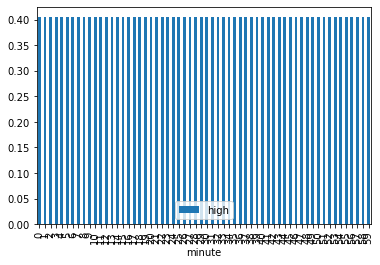

                     high
minute                   
0       0.405352577319588
1       0.405287500000000
2       0.405245833333333
3       0.405253125000000
4       0.405280208333333
5       0.405355208333333
6       0.405394791666667
7       0.405484375000000
8       0.405445833333333
9       0.405396875000000
10      0.405464583333333
11      0.405502083333333
12      0.405547916666667
13      0.405527083333333
14      0.405481250000000
15      0.405520833333333
16      0.405406250000000
17      0.405341666666667
18      0.405286458333333
19      0.405312500000000
20      0.405307291666667
21      0.405345833333333
22      0.405320833333333
23      0.405305208333333
24      0.405296875000000
25      0.405276041666667
26      0.405194791666667
27      0.405257291666667
28      0.405235416666667
29      0.405242708333333
30      0.405330208333333
31      0.405288541666667
32      0.405314583333333
33      0.405282291666667
34      0.405289583333333
35      0.405300000000000
36      0.40

In [6]:
# 1- high by day of week 
import matplotlib.pyplot as plt

min_high.groupby('minute').mean().plot(kind='bar')
plt.show()

min_high_mean_min = min_high.groupby('minute').mean()
print(min_high.groupby('minute').mean())

In [7]:
min_high_mean_min.loc[min_high_mean_min['high'].idxmax()]

high    0.405576041666667
Name: 47, dtype: float64

In [8]:
min_high_mean_min.loc[min_high_mean_min['high'].idxmin()]

high    0.405194791666667
Name: 26, dtype: float64

In [9]:
# 2- open by day 
min_open = pd.DataFrame({'minute':minute, 'open':merged_df['open']})
print(min_open)

      minute    open
0          0  0.3915
1          1  0.3920
2          2  0.3907
3          3  0.3910
4          4  0.3915
5          5  0.3920
6          6  0.3928
7          7  0.3923
8          8  0.3923
9          9  0.3928
10        10  0.3926
11        11  0.3933
12        12  0.3932
13        13  0.3921
14        14  0.3912
15        15  0.3915
16        16  0.3912
17        17  0.3910
18        18  0.3915
19        19  0.3935
20        20  0.3940
21        21  0.3941
22        22  0.3946
23        23  0.3942
24        24  0.3938
25        25  0.3934
26        26  0.3937
27        27  0.3928
28        28  0.3926
29        29  0.3928
30        30  0.3922
31        31  0.3931
32        32  0.3935
33        33  0.3943
34        34  0.3946
35        35  0.3947
36        36  0.3942
37        37  0.3940
38        38  0.3944
39        39  0.3942
40        40  0.3942
41        41  0.3946
42        42  0.3945
43        43  0.3946
44        44  0.3947
45        45  0.3950
46        46 

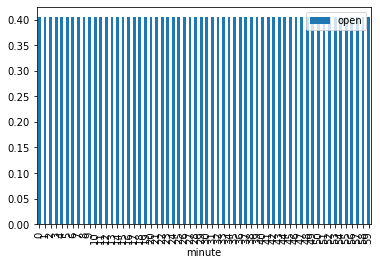

                     open
minute                   
0       0.405005154639175
1       0.404942708333333
2       0.404886458333333
3       0.404881250000000
4       0.404945833333333
5       0.404950000000000
6       0.405041666666667
7       0.405044791666667
8       0.405201041666667
9       0.405107291666667
10      0.405109375000000
11      0.405147916666667
12      0.405189583333333
13      0.405248958333333
14      0.405206250000000
15      0.405227083333333
16      0.405097916666667
17      0.405092708333333
18      0.404980208333333
19      0.405035416666667
20      0.405037500000000
21      0.404986458333333
22      0.405019791666667
23      0.405004166666667
24      0.404984375000000
25      0.404991666666667
26      0.404911458333333
27      0.404927083333333
28      0.404923958333333
29      0.404956250000000
30      0.404998958333333
31      0.404973958333333
32      0.404993750000000
33      0.404990625000000
34      0.404966666666667
35      0.405029166666667
36      0.40

In [10]:
#open prices across all miutes 
min_open.groupby('minute').mean().plot(kind='bar')
plt.show()

min_open_mean_day = min_open.groupby('minute').mean()
print(min_open.groupby('minute').mean())

In [11]:
min_open_mean_day.loc[min_open_mean_day['open'].idxmax()]

open    0.40526875
Name: 57, dtype: float64

In [12]:
min_open_mean_day.loc[min_open_mean_day['open'].idxmin()]

open    0.40488125
Name: 3, dtype: float64

      minute   close
0          0  0.3920
1          1  0.3907
2          2  0.3910
3          3  0.3915
4          4  0.3920
5          5  0.3928
6          6  0.3923
7          7  0.3923
8          8  0.3928
9          9  0.3926
10        10  0.3933
11        11  0.3934
12        12  0.3921
13        13  0.3912
14        14  0.3914
15        15  0.3912
16        16  0.3910
17        17  0.3915
18        18  0.3935
19        19  0.3940
20        20  0.3941
21        21  0.3946
22        22  0.3942
23        23  0.3938
24        24  0.3934
25        25  0.3937
26        26  0.3928
27        27  0.3926
28        28  0.3928
29        29  0.3922
30        30  0.3931
31        31  0.3935
32        32  0.3943
33        33  0.3946
34        34  0.3947
35        35  0.3942
36        36  0.3940
37        37  0.3942
38        38  0.3942
39        39  0.3942
40        40  0.3946
41        41  0.3945
42        42  0.3946
43        43  0.3947
44        44  0.3950
45        45  0.3947
46        46 

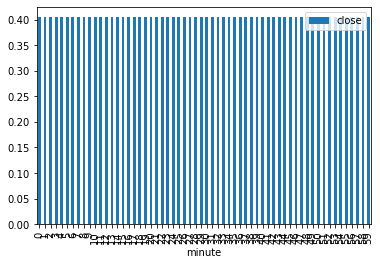

                    close
minute                   
0       0.404927835051546
1       0.404883333333333
2       0.404883333333333
3       0.404943750000000
4       0.404952083333333
5       0.405033333333333
6       0.405044791666667
7       0.405203125000000
8       0.405107291666667
9       0.405112500000000
10      0.405146875000000
11      0.405191666666667
12      0.405253125000000
13      0.405200000000000
14      0.405226041666667
15      0.405093750000000
16      0.405090625000000
17      0.404978125000000
18      0.405038541666667
19      0.405038541666667
20      0.404986458333333
21      0.405021875000000
22      0.405002083333333
23      0.404981250000000
24      0.404994791666667
25      0.404913541666667
26      0.404927083333333
27      0.404925000000000
28      0.404956250000000
29      0.405002083333333
30      0.404973958333333
31      0.404992708333333
32      0.404988541666667
33      0.404966666666667
34      0.405033333333333
35      0.404996875000000
36      0.40

In [13]:
# 3- close by day 
min_close = pd.DataFrame({'minute':minute, 'close':merged_df['close']})
print(min_close)

#close prices across all miutes 
min_close.groupby('minute').mean().plot(kind='bar')
plt.show()

min_close_mean_min = min_close.groupby('minute').mean()
print(min_close.groupby('minute').mean())


In [14]:
min_close_mean_min.loc[min_close_mean_min['close'].idxmax()]

close    0.405269791666667
Name: 56, dtype: float64

In [15]:
min_close_mean_min.loc[min_close_mean_min['close'].idxmin()]

close    0.404883333333333
Name: 1, dtype: float64

In [16]:
# 4 -volume 
min_volume = pd.DataFrame({'minute':minute, 'volume':merged_df['volume']})
print(min_volume)

      minute                  volume
0          0   29263.836500000001251
1          1   59979.447999999996682
2          2   38958.865799999999581
3          3    4131.387200000000121
4          4    7678.984499999999571
5          5    5536.070700000000215
6          6   23094.585999999999331
7          7    3801.810300000000097
8          8    7889.746100000000297
9          9   10292.783199999999852
10        10    8583.000299999999697
11        11    3857.807099999999991
12        12   30020.418300000001182
13        13    9659.436499999999796
14        14    1511.799299999999903
15        15   31058.523000000001048
16        16     787.000599999999963
17        17    1230.301799999999957
18        18   18286.319299999999203
19        19    8837.265199999999822
20        20   13350.558699999999590
21        21   28772.890100000000530
22        22   10610.760099999999511
23        23   13204.248600000000806
24        24   20450.718400000001566
25        25    2169.286000000000058
2

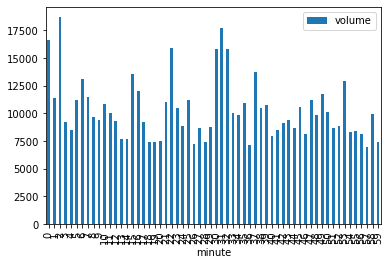

                       volume
minute                       
0       16666.572078350516676
1       11395.768514583332944
2       18723.619582291667029
3        9256.512833333332310
4        8521.305042708332621
5       11202.473853124998641
6       13143.383335416665432
7       11467.019961458332546
8        9676.289776041667210
9        9404.712830208332889
10      10812.734865624999657
11      10040.572485416667405
12       9309.557256250000137
13       7675.385732291666500
14       7718.252884374999667
15      13552.053701041666500
16      12025.023502083333369
17       9248.308820833333812
18       7382.011206250000214
19       7416.858290625000336
20       7472.662262499999088
21      11064.709511458333509
22      15928.343458333334638
23      10476.078240625000035
24       8875.737019791666171
25      11185.830602083333360
26       7227.895903125000586
27       8707.920006250000370
28       7403.420073958332978
29       8773.466015625001091
30      15866.180245833333174
31      17

In [17]:
min_volume.groupby('minute').mean().plot(kind='bar')
plt.show()

min_volume_mean_min = min_volume.groupby('minute').mean()
print(min_volume.groupby('minute').mean())



In [18]:
min_volume_mean_min.loc[min_volume_mean_min['volume'].idxmax()]

volume    18723.619582291667029
Name: 2, dtype: float64

In [19]:
min_volume_mean_min.loc[min_volume_mean_min['volume'].idxmin()]

volume    6996.206812500000524
Name: 57, dtype: float64

In [20]:
# 5 -difference_hl 

merged_df['Difference_hl'] = merged_df['high'] - merged_df['low']
print(merged_df.Difference_hl)

0       0.0008
1       0.0015
2       0.0004
3       0.0010
4       0.0007
5       0.0011
6       0.0005
7       0.0005
8       0.0006
9       0.0006
10      0.0008
11      0.0007
12      0.0016
13      0.0011
14      0.0003
15      0.0008
16      0.0002
17      0.0008
18      0.0020
19      0.0010
20      0.0005
21      0.0011
22      0.0005
23      0.0007
24      0.0004
25      0.0003
26      0.0012
27      0.0007
28      0.0006
29      0.0009
30      0.0010
31      0.0004
32      0.0008
33      0.0007
34      0.0003
35      0.0005
36      0.0007
37      0.0004
38      0.0004
39      0.0003
40      0.0008
41      0.0003
42      0.0004
43      0.0001
44      0.0005
45      0.0005
46      0.0003
47      0.0007
48      0.0018
49      0.0018
50      0.0011
51      0.0004
52      0.0006
53      0.0009
54      0.0012
55      0.0005
56      0.0003
57      0.0004
58      0.0005
59      0.0005
60      0.0011
61      0.0017
62      0.0012
63      0.0010
64      0.0010
65      0.0008
66      0.

In [21]:
merged_df_diff_hl = pd.DataFrame({'minute':minute, 'Difference_hl':merged_df['Difference_hl']})
print(merged_df_diff_hl)

      minute  Difference_hl
0          0         0.0008
1          1         0.0015
2          2         0.0004
3          3         0.0010
4          4         0.0007
5          5         0.0011
6          6         0.0005
7          7         0.0005
8          8         0.0006
9          9         0.0006
10        10         0.0008
11        11         0.0007
12        12         0.0016
13        13         0.0011
14        14         0.0003
15        15         0.0008
16        16         0.0002
17        17         0.0008
18        18         0.0020
19        19         0.0010
20        20         0.0005
21        21         0.0011
22        22         0.0005
23        23         0.0007
24        24         0.0004
25        25         0.0003
26        26         0.0012
27        27         0.0007
28        28         0.0006
29        29         0.0009
30        30         0.0010
31        31         0.0004
32        32         0.0008
33        33         0.0007
34        34        

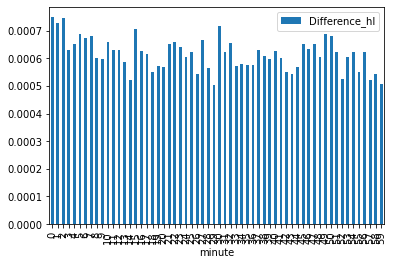

            Difference_hl
minute                   
0       0.000749484536082
1       0.000728125000000
2       0.000745833333333
3       0.000630208333333
4       0.000650000000000
5       0.000687500000000
6       0.000671875000000
7       0.000679166666667
8       0.000600000000000
9       0.000595833333333
10      0.000660416666667
11      0.000630208333333
12      0.000629166666667
13      0.000587500000000
14      0.000519791666667
15      0.000707291666667
16      0.000627083333333
17      0.000614583333333
18      0.000551041666667
19      0.000572916666667
20      0.000568750000000
21      0.000651041666667
22      0.000659375000000
23      0.000640625000000
24      0.000605208333333
25      0.000623958333333
26      0.000543750000000
27      0.000664583333333
28      0.000563541666667
29      0.000504166666667
30      0.000715625000000
31      0.000622916666667
32      0.000656250000000
33      0.000572916666667
34      0.000578125000000
35      0.000576041666667
36      0.00

In [22]:
merged_df_diff_hl.groupby('minute').mean().plot(kind='bar')
plt.show()
merged_df_diff_hl_mean = merged_df_diff_hl.groupby('minute').mean()
print(merged_df_diff_hl.groupby('minute').mean())

In [23]:
merged_df_diff_hl_mean.loc[merged_df_diff_hl_mean['Difference_hl'].idxmax()]

Difference_hl    0.000749484536082
Name: 0, dtype: float64

In [24]:
merged_df_diff_hl_mean.loc[merged_df_diff_hl_mean['Difference_hl'].idxmin()]

Difference_hl    0.000504166666667
Name: 29, dtype: float64

In [25]:
# 6 -difference_oc

merged_df['difference_oc'] = merged_df['open'] - merged_df['close']
print(merged_df.difference_oc)


0      -0.0005
1       0.0013
2      -0.0003
3      -0.0005
4      -0.0005
5      -0.0008
6       0.0005
7       0.0000
8      -0.0005
9       0.0002
10     -0.0007
11     -0.0001
12      0.0011
13      0.0009
14     -0.0002
15      0.0003
16      0.0002
17     -0.0005
18     -0.0020
19     -0.0005
20     -0.0001
21     -0.0005
22      0.0004
23      0.0004
24      0.0004
25     -0.0003
26      0.0009
27      0.0002
28     -0.0002
29      0.0006
30     -0.0009
31     -0.0004
32     -0.0008
33     -0.0003
34     -0.0001
35      0.0005
36      0.0002
37     -0.0002
38      0.0002
39      0.0000
40     -0.0004
41      0.0001
42     -0.0001
43     -0.0001
44     -0.0003
45      0.0003
46     -0.0003
47     -0.0005
48     -0.0011
49     -0.0011
50      0.0003
51      0.0003
52      0.0002
53     -0.0001
54     -0.0010
55      0.0001
56      0.0002
57     -0.0003
58     -0.0003
59     -0.0005
60     -0.0007
61     -0.0013
62      0.0009
63      0.0001
64     -0.0005
65     -0.0002
66     -0.

In [26]:
merged_df_diff_oc = pd.DataFrame({'minute':minute, 'difference_oc':merged_df['difference_oc']})
print(merged_df_diff_oc)

      minute  difference_oc
0          0        -0.0005
1          1         0.0013
2          2        -0.0003
3          3        -0.0005
4          4        -0.0005
5          5        -0.0008
6          6         0.0005
7          7         0.0000
8          8        -0.0005
9          9         0.0002
10        10        -0.0007
11        11        -0.0001
12        12         0.0011
13        13         0.0009
14        14        -0.0002
15        15         0.0003
16        16         0.0002
17        17        -0.0005
18        18        -0.0020
19        19        -0.0005
20        20        -0.0001
21        21        -0.0005
22        22         0.0004
23        23         0.0004
24        24         0.0004
25        25        -0.0003
26        26         0.0009
27        27         0.0002
28        28        -0.0002
29        29         0.0006
30        30        -0.0009
31        31        -0.0004
32        32        -0.0008
33        33        -0.0003
34        34        

In [28]:
merged_df_diff_oc.groupby('minute').mean().plot(kind='bar')
plt.show()
merged_df_diff_oc_mean = merged_df_diff_oc.groupby('minute').mean()
print(merged_df_diff_oc.groupby('minute').mean
      
plt.figure(figsize=(8,8)).show()

SyntaxError: invalid syntax (4057804613.py, line 6)

In [ ]:
merged_df_diff_oc_mean.loc[merged_df_diff_oc_mean['difference_oc'].idxmax()]

In [ ]:
merged_df_diff_oc_mean.loc[merged_df_diff_oc_mean['difference_oc'].idxmin()]